In [52]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
sys.path.append("../src")
from src.utils.plotting import plot_all_barplots, plot_setup, set_size

from src.examples.example_setup import setup_DynamicIVCD
from ccb import CCB

import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reward distro across time

In [7]:
reward = [0.493, 0.5070000000000001, 0.773, 0.22700000000000004]
reward1 = [0.5490000000000003, 0.5546000000000002, 0.6610000000000003, 0.5518000000000002]
reward2 = [0.5863333333333336, 0.5894444444444447, 0.6485555555555558, 0.5878888888888891]
rewards = [reward, reward1, reward2]
rewards

[[0.493, 0.5070000000000001, 0.773, 0.22700000000000004],
 [0.5490000000000003,
  0.5546000000000002,
  0.6610000000000003,
  0.5518000000000002],
 [0.5863333333333336,
  0.5894444444444447,
  0.6485555555555558,
  0.5878888888888891]]

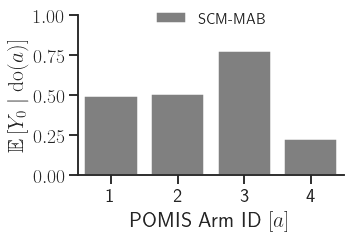

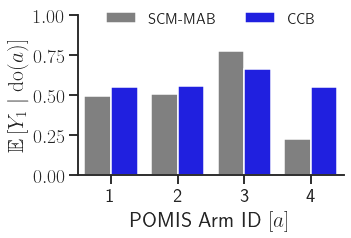

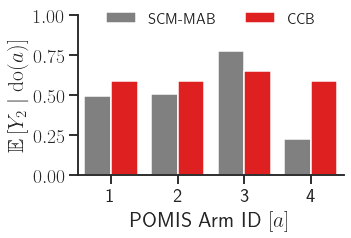

In [9]:
plot_all_barplots(rewards, True)

In [2]:
from src.utils.plotting import superimposed_rewards_plot

In [3]:
pomis_ids = range(1,5)
rewards = {0: (0.4454,
  0.493,
  0.5070000000000001,
  0.773,
  0.22700000000000004,
  0.493,
  0.493,
  0.5070000000000001,
  0.5070000000000001),
 1: (0.6610000000000003,
  0.5490000000000003,
  0.5546000000000001,
  0.6610000000000003,
  0.5518000000000002,
  0.5490000000000003,
  0.5490000000000003,
  0.5546000000000001,
  0.5546000000000001),
 2: (0.6485555555555558,
  0.5863333333333336,
  0.5894444444444447,
  0.6485555555555558,
  0.5878888888888891,
  0.5863333333333336,
  0.5863333333333336,
  0.5894444444444447,
  0.5894444444444447),
 3: (0.6437692307692311,
  0.600692307692308,
  0.6028461538461543,
  0.6437692307692311,
  0.6017692307692311,
  0.600692307692308,
  0.600692307692308,
  0.6028461538461543,
  0.6028461538461543),
 4: (0.6050000000000002,
  0.5863333333333335,
  0.587266666666667,
  0.6050000000000002,
  0.6050000000000002,
  0.5863333333333335,
  0.5863333333333335,
  0.587266666666667,
  0.587266666666667)}

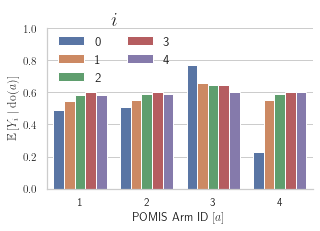

In [22]:
superimposed_rewards_plot(rewards, save=False)

# Optimal arm selection probability

In [118]:
params = setup_DynamicIVCD(5)
params['n_trials'] = 10
params['horizon'] = 1000 
m = CCB(**params)
m.run()

Time index:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Time index:  20%|██        | 1/5 [00:00<00:02,  1.50it/s]

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done   2 out of  10 | elapsed:    0.6s remaining:    2.4s
[Parallel(n_jobs=12)]: Done   3 out of  10 | elapsed:    0.6s remaining:    1.4s
[Parallel(n_jobs=12)]: Done   4 out of  10 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=12)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=12)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=12)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Batch computation too fast (0.0538s.) Setting batch_size=

Time index:  80%|████████  | 4/5 [00:01<00:00,  5.18it/s]

[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Batch computation too fast (0.0438s.) Setting batch_size=2.
[Parallel(n_jobs=12)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   8 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.

Time index: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Batch computation too fast (0.0519s.) Setting batch_size=2.
[Parallel(n_jobs=12)]: Done   2 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=12)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done   8 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.1s finished


In [76]:
from src.utils.plotting import plot_probability

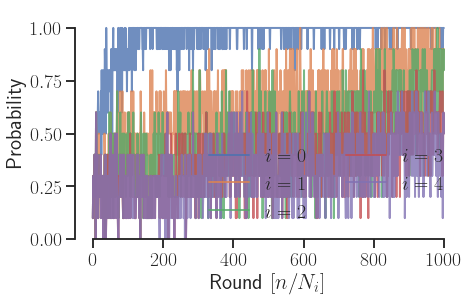

In [119]:
plot_probability(m, 0,5, 1000)

# Cumulative regret

In [39]:
import numpy as np
import multiprocessing
from npsem.NIPS2018POMIS_exp.test_bandit_strategies import compute_cumulative_regret 
from npsem.utils import with_default
from npsem.viz_util import sparse_index

In [ ]:
temporal_index = 1
target = 'Y_1'
# Check that indices line up for this time-slice
target_var_only, target_var_temporal_index = target.split("_")
assert int(target_var_temporal_index) == temporal_index

# SEM
SEM = testSEM()

# Create SCM
scm = StructuralCausalModel(
    G=m.causal_diagrams[temporal_index],
    F=SEM,
    P_U=m.P_U,
    D=m.domains,
    more_U=m.more_U,
)

#  Convert time-slice SCM to bandit machine
past_interventions = [{"Z":0}]
num_simulation_repeats = 100
horizon=5000
results, mu = main_experiment_ccb(
    scm, target_var_only, past_interventions, num_simulation_repeats, horizon, n_jobs=3 * multiprocessing.cpu_count() // 2
)

In [ ]:
num_simulation_repeats = 100
horizon=5000
results_scmmab, mu_scmmab = main_experiment_ccb(
    scm, target_var_only, None, num_simulation_repeats, horizon, n_jobs=3 * multiprocessing.cpu_count() // 2
)

In [ ]:
mu_star = max(mu_scmmab)
out_scmmab = {'TS':None, 'UCB':None}
for pi in ['TS', 'UCB']:
    value_matrix = compute_cumulative_regret(results_scmmab[('POMIS', pi)][1], mu_star, remove_negative_cr=False)

    mean_x = np.mean(value_matrix, axis=0)
    sd_x = np.std(value_matrix, axis=0)
    lower, upper = mean_x - sd_x, mean_x + sd_x
    cut_time = 2000
    time_points = sparse_index(with_default(cut_time, len(mean_x)), 200)
    out_scmmab[pi] = [time_points, mean_x, lower, upper]

plot_CR(out_scmmab, 'scmmab')

In [ ]:
mu_star = max(mu)
out = {'TS':None, 'UCB':None}
for pi in ['TS', 'UCB']:
    value_matrix = compute_cumulative_regret(results[('POMIS', pi)][1], mu_star, remove_negative_cr=False)

    mean_x = np.mean(value_matrix, axis=0)
    sd_x = np.std(value_matrix, axis=0)
    lower, upper = mean_x - sd_x, mean_x + sd_x
    cut_time = 2000
    time_points = sparse_index(with_default(cut_time, len(mean_x)), 200)
    out[pi] = [time_points, mean_x, lower, upper]

plot_CR(out, 'ccb')